# Data Cleaning and Data Preprocessing Notebook

**Group:**

This notebook is used to cleaned the dataset and prepare the data for analysis by doing the following

    - Rename the table for readability
    - Dealing with missingness 
    - Combine the dataset with population data in 2022 

### Data Sources: 
In this report, we will have 3 data sets: 
  1. `US Car Accidents in 2022`: US car accidents from [SOBHAN MOOSAVI](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents):
   The original dataset is a countrywide car accident dataset that covers 49 states of the USA from 2016-2023. From this dataset, I filtered for records in 2022. This data records information  about the time of the accident, the accident location, weather related information (such as temperation, humidity, and wind-direction), and yes/no response to traffic signs. This data is relatively big so I will do further cleaning/flitering for easier analysis. Due to the big dataset, I will only included the processed data in the `/data/` folder. If you are interested in learning and running the below code, here is the [Google Drive link]() for the 2022 car accidents data (for the code to run, remember to store the data in `/data/raw/` folder 
   

   2. `us-states.json` : GeoJSON data of US states from [Kaggle](https://www.kaggle.com/datasets/pompelmo/usa-states-geojson)
  This JSON file contains geographical data about 49 states of USA. The data contains information about each state coordinates, each state full's name and abbreviation. This data will allow us to undergo geospatial analysis on the data
  
  3) `US_State_Populations_2022.csv`: 
  
## 1) Load Libraries + Data

In [4]:
# Import libraries 
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import warnings
import zipfile

current_wd=os.getcwd()


Open the zipfile

In [ ]:
# Extract the data.zip folder

# Path to the zip file
zip_path = f"{current_wd}/data/raw/us_car_accidents_2022.csv.zip"

# Directory to extract to
extract_to = f"{current_wd}/data/raw"
# Unzipping the folder
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [5]:
# Loading US Accidents data
df_accident = pd.read_csv(f"{current_wd}/data/raw/us_car_accidents_2022.csv")

#Load US Geo data
with open(f"{current_wd}/data/raw/us-states.json", encoding='utf8') as code:
    usa_states = json.load(code)
    
# Loading US Populations by States
df_population = pd.read_csv(f"{current_wd}/data/raw/US_State_Populations_2022.csv")

Print US Accidents Data + US Population Data + US Geo Data

In [6]:
df_accident.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Day,Day
1,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,False,False,True,False,Night,Night,Night,Night
3,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,False,False,Night,Day,Day,Day


In [7]:
df_population.head()

,State,Population
0,California,39029342
1,Texas,30029572
2,Florida,22244823
3,New York,19677151
4,Pennsylvania,12972008


In [8]:
# print columns name
df_accident.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

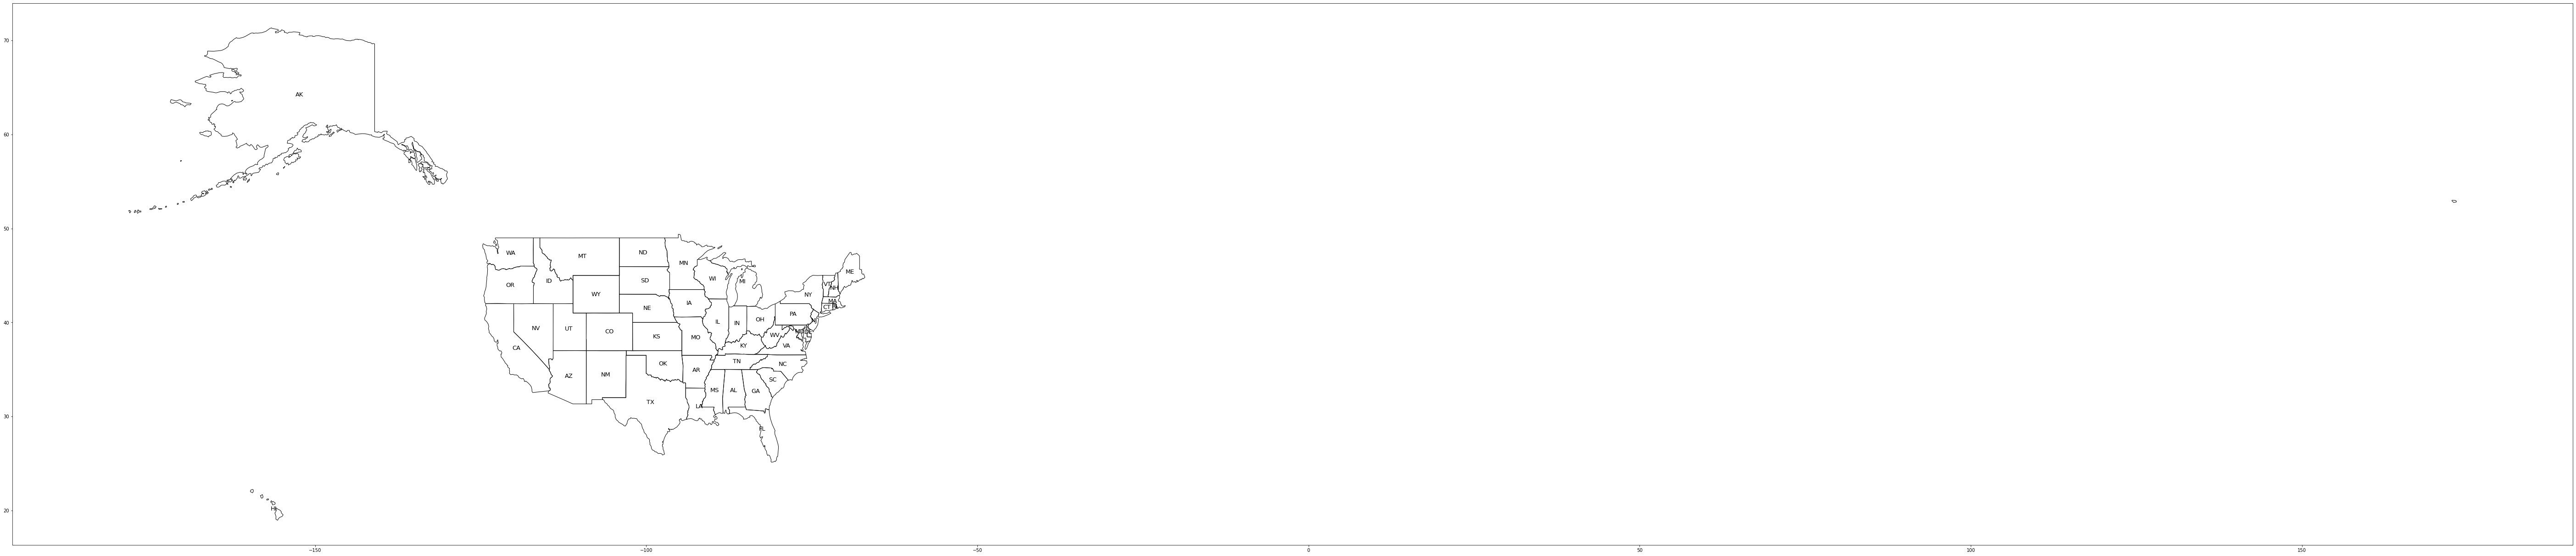

In [9]:
# Step 1: Read the GeoJSON Data
geojson_path = f'{current_wd}/data/raw/us-states.json'
us_states_gdf = gpd.read_file(geojson_path)

# Create a plot
ax = us_states_gdf.plot(figsize=(100, 100), edgecolor='k', facecolor='none')

state_abbr=[]
x_coor=[]
y_coor=[]
for feature in usa_states['features']:
    state_name = feature['properties']['name']
    state_abbr.append(feature['id'])# Assuming the abbreviation is in the GeoJSON properties
    centroid = gpd.GeoDataFrame.from_features([feature]).geometry.centroid
    x_coor.append(centroid.geometry.x)
    y_coor.append(centroid.geometry.y)

# Add labels to the plot
for x, y, label in zip(x_coor, y_coor, state_abbr):
    ax.text(x, y, label, fontsize=13, ha='center', va='center')
    
# Export the map
plt.savefig('us_states_gdf.jpg')

warnings.filterwarnings('ignore')


## 2) Data Cleaning: 

Our next step is to remove unnecessary columns, handle missing values, and check on the data columns's type

Data Cleaning for US Car Accidents: 

1. Remove unnecessary columns: This table is relatively large so I am going to remove some columns that are not needed for the analysis 

These are the columns that I will keep will be

In [10]:
selected_columns = ['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'State', 'Timezone',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)','Humidity(%)'
        , 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Wind_Speed(mph)'
        , 'Precipitation(in)', 'Weather_Condition', 'Traffic_Signal', 'Sunrise_Sunset']

2. Make changes on column's types:
- `Start_Time` and `End_Time` is in Object Type, I want to change it to datetime for easy analysis  

3. Rename the columns for readibility 

4. Filter out data to only include US car accidents from 2022 until March 2023

5. Handle Missing Values median or mean imputation by city 

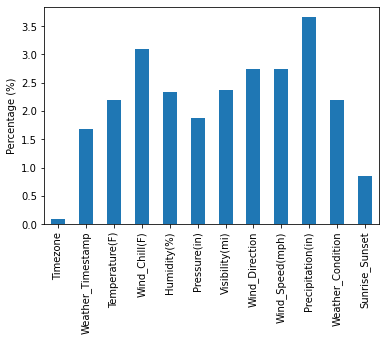

In [11]:

# Select data with the selected columns 
processed_df_accident = df_accident[selected_columns]

# Change in column Type 
processed_df_accident['Start_Time'] = pd.DatetimeIndex(processed_df_accident['Start_Time'])
processed_df_accident['End_Time'] = pd.DatetimeIndex(processed_df_accident['End_Time'])
processed_df_accident['Weather_Timestamp'] = pd.DatetimeIndex(processed_df_accident['Weather_Timestamp'])

# Rename Columns Name for human's readibility 
renamed_columns= {'Start_Lat': 'Start_Lattitude'
                  , 'Start_Lng': 'Start_Longitude'}
processed_df_accident.rename(columns=renamed_columns, inplace=True)


# Plots Missing Data
percentage_of_missing_values=processed_df_accident.isna().sum()/len(processed_df_accident)*100
ax = percentage_of_missing_values[percentage_of_missing_values != 0].plot(kind="bar")

# Adding y-axis label
ax.set_ylabel("Percentage (%)")

# Display the plot
plt.show()

For missing data, 
- For object type columns, like `Weather_Timestamp`,`Wind_Direction`, I will choose median imputation
- For numerical type columns, I would do mean imputation. 

In [12]:
# Columns that have null values
columns_to_process = list(percentage_of_missing_values[percentage_of_missing_values!=0].index)
for column in columns_to_process:
    if processed_df_accident[column].dtype == np.float64 or processed_df_accident[column].dtype == np.int64:
        # Fill missing values with mean for numeric columns
        processed_df_accident[column] = processed_df_accident[column].fillna(processed_df_accident[column].mean())
    else:
        # Fill missing values with median for non-numeric columns
        processed_df_accident[column] = processed_df_accident[column].fillna(processed_df_accident[column].mode()[0])

Data Cleaning for Population Data
- Add another column with a corresponding state abbreviation name

In [13]:
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA",
    "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA",
    "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA", "Maine": "ME", "Maryland": "MD",
    "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS", "Missouri": "MO",
    "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH",
    "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA","District of Columbia":"DC", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY",
}

# Create state abreviation column
df_population['State_Abbrv'] = df_population['State'].map(state_abbreviations)
df_population=df_population[['State_Abbrv','Population']]
df_population.head()

,State_Abbrv,Population
0,CA,39029342
1,TX,30029572
2,FL,22244823
3,NY,19677151
4,PA,12972008


## 3) Join with population data

Merge the population data with the car accidents data on `State` and `State_Abbrv` columns

In [14]:

result = processed_df_accident.merge(df_population, left_on='State', right_on='State_Abbrv', how='left')
result.head()

,ID,Severity,Start_Time,End_Time,Start_Lattitude,Start_Longitude,Distance(mi),Description,State,Timezone,...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,State_Abbrv,Population
0,A-512230,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,0.00,Crash on CR-11 Army Trail Rd at IL-59.,IL,US/Central,...,29.24,10.0,CALM,0.0,0.0,Fair,True,Night,IL,12582032
1,A-512231,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,0.00,Crash on CA-138 Pearblossom Hwy at 96th St.,CA,US/Pacific,...,27.35,10.0,W,6.0,0.0,Fair,False,Night,CA,39029342
2,A-512232,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,0.00,Crash on 2nd St Northbound at Franklin St.,VA,US/Eastern,...,29.71,10.0,N,8.0,0.0,Mostly Cloudy,True,Night,VA,8683619
3,A-512233,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,0.00,Crash on US-62 Atlantic Blvd Westbound after O...,OH,US/Eastern,...,28.71,7.0,NNE,6.0,0.0,Mostly Cloudy,False,Night,OH,11756058
4,A-512234,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,1.91,Crash on entry ramp to I-77 Northbound at Exit...,OH,US/Eastern,...,29.37,7.0,SSE,3.0,0.0,Partly Cloudy,False,Night,OH,11756058


In [15]:
result.shape

(1762452, 24)

## Export the data for other analysis 

In [16]:
result.to_csv(f'{current_wd}/data/processed_us_car_accidents_2022.csv')